In [1]:
from scipy.stats import entropy
import nibabel as nib 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [7]:
#check which statistic is most useful to train model with segmentation masks
# statistics include: mean, standard deviation, variance, skewnee, kurtosis, entropy

#load in the data
hard_image = '/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/hard_masked/118866/118866.nii.gz'
soft_image = '/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/soft_masked/118866/118866.nii.gz'
hard_img = nib.load(hard_image)
soft_img = nib.load(soft_image)
hard_data = hard_img.get_fdata()
soft_data = soft_img.get_fdata()

#Clip and normalize the image 
clipped_hard = np.clip(hard_data, -1024, 3072)
clipped_soft = np.clip(soft_data, -1024, 3072)
normalizer = interp1d([-1024,3072], [-1,1])
norm_data_hard = normalizer(clipped_hard)
norm_data_soft = normalizer(clipped_soft)

#calculate the statistics
hard_mean = np.mean(norm_data_hard)
soft_mean = np.mean(norm_data_soft)
hard_mean, soft_mean

(-0.78437651960053, -0.7854122403153297)

In [10]:
hard_image = '/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/hard_masked/119764/119764.nii.gz'
soft_image = '/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/soft_masked/119764/119764.nii.gz'
hard_img = nib.load(hard_image)
soft_img = nib.load(soft_image)
hard_data = hard_img.get_fdata()
soft_data = soft_img.get_fdata()

#Clip and normalize the image 
clipped_hard = np.clip(hard_data, -1024, 3072)
clipped_soft = np.clip(soft_data, -1024, 3072)
normalizer = interp1d([-1024,3072], [-1,1])
norm_data_hard = normalizer(clipped_hard)
norm_data_soft = normalizer(clipped_soft)

#calculate the statistics
hard_mean = np.mean(norm_data_hard)
soft_mean = np.mean(norm_data_soft)
hard_mean, soft_mean

(-0.7883954646948472, -0.7892098149730671)

In [ ]:
muscle_hard = nib.load('/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/hard_masked/118866/segmentations/skeletal_muscle.nii.gz')
fat_hard = nib.load("/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/hard_masked/118866/segmentations/")

In [ ]:
# Load multiple masks. Explore mean and std of the image within the mask 
muscle_hard = nib.load('/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/hard_masked/118866/segmentations/skeletal_muscle.nii.gz')
fat_hard = nib.load('/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/hard_masked/119178/segmentations/subcutaneous_fat.nii.gz')
muscle_soft = nib.load('/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/soft_masked/119178/segmentations/skeletal_muscle.nii.gz')
fat_soft = nib.load('/valiant02/masi/krishar1/TotalSegmentator_masks_CTkernel_MIDL/B30f_B50f/soft_masked/119178/segmentations/subcutaneous_fat.nii.gz')
muscle_data = muscle_hard.get_fdata()
fat_data = fat_hard.get_fdata()
muscle_soft_data = muscle_soft.get_fdata()
fat_soft_data = fat_soft.get_fdata()

#calculate the statistics using the muscle mask in the image 
muscle_mean = np.mean(hard_data[muscle_data == 1])
muscle_std = np.std(hard_data[muscle_data == 1])
fat_mean = np.mean(hard_data[fat_data == 1])
fat_std = np.std(hard_data[fat_data == 1])

muscle_soft_mean = np.mean(soft_data[muscle_soft_data == 1])
muscle_soft_std = np.std(soft_data[muscle_soft_data == 1])
fat_soft_mean = np.mean(soft_data[fat_soft_data == 1])
fat_soft_std = np.std(soft_data[fat_soft_data == 1])

muscle_mean, muscle_soft_mean, muscle_std, muscle_soft_std, fat_mean, fat_soft_mean, fat_std, fat_soft_std

(29.43140775659209,
 114.1758257725864,
 -103.8989985012111,
 98.41642368046736,
 31.53152766845362,
 50.26436155494546,
 -101.62994936328461,
 41.0206963352474)

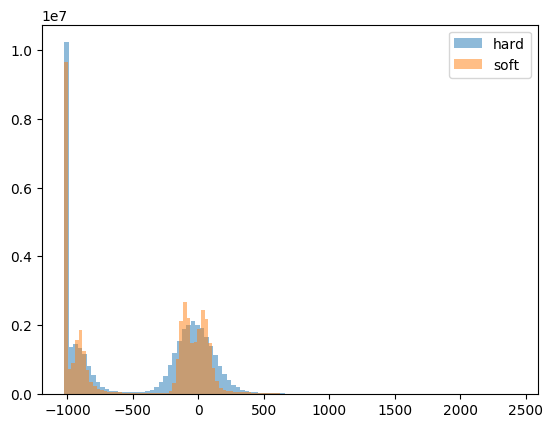

In [4]:
#Plot histogram of the image data 
plt.hist(hard_data.flatten(), bins=100, alpha=0.5, label='hard')
plt.hist(soft_data.flatten(), bins=100, alpha=0.5, label='soft')
plt.legend(loc='upper right')
plt.show()

### Tissue statistic using multilable image

In [ ]:
hard_image = nib.load("/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/hard_masked/122924/122924.nii.gz")
hard_mask = nib.load("/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/basic_experiments/mask.nii.gz")

hard_image_data = hard_image.get_fdata()
hard_image_mask = hard_mask.get_fdata()

fused_mask = np.where(hard_image_mask > 0, 1, 0) #Fuse all the labels into one for computing statistics
nifti_mask = nib.Nifti1Image(fused_mask, hard_mask.affine, hard_mask.header)
nib.save(nifti_mask, "fused_mask.nii.gz")